# Closest points between convex polygons

To find the closest points between two disjoint convex polygons P and Q, an optimal algorithm with O(n+m) computational time can be achieved using the rotating calipers technique. This technique leverages the convexity of the polygons to efficiently locate the closest points without having to compare every pair of points between P and Q.

### Caliper's technique

In [1]:
import matplotlib.pyplot as plt
import math

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def plot_iteration(P, Q, p, q, closest_pair, min_dist, iteration):
    fig, ax = plt.subplots(figsize=(8, 6))
    # ax.set_facecolor('lightgrey')
    ax.set_title(f"Iteration {iteration}")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

    # Plot polygon P
    Px, Py = zip(*P)
    ax.plot(list(Px) + [Px[0]], list(Py) + [Py[0]], 'b-', label="Polygon P", marker='o')
    
    # Plot polygon Q
    Qx, Qy = zip(*Q)
    ax.plot(list(Qx) + [Qx[0]], list(Qy) + [Qy[0]], 'r-', label="Polygon Q", marker='o')
    
    # Plot the current pair of points being checked
    ax.plot([P[p][0], Q[q][0]], [P[p][1], Q[q][1]], 'go-', label="Current Pair")

    # Plot the closest pair found so far
    if closest_pair[0] and closest_pair[1]:
        ax.plot([closest_pair[0][0], closest_pair[1][0]], 
                [closest_pair[0][1], closest_pair[1][1]], 'k--', label="Closest Pair So Far")
    
    # Display min distance text
    ax.text(0.05, 0.95, f"Min Distance: {min_dist:.2f}", ha="left", va="top", transform=ax.transAxes)
    
    ax.legend()
    ax.grid(True)
    ax.axis("equal")
    plt.pause(0.5)  # Pause to allow visualization
    plt.close(fig)

def closest_points_convex_polygons_visual(P, Q, plot):
    n, m = len(P), len(Q)

    # Find the leftmost point in P and the rightmost point in Q (antipodal points)
    left_P = min(range(n), key=lambda p: P[p][0])
    right_Q = max(range(m), key=lambda q: Q[q][0])

    min_dist = float('inf')
    closest_pair = (None, None)

    p, q = left_P, right_Q

    # Visualization setup
    plt.ion()
    fig = plt.figure()

    # Main algorithm loop
    for iteration in range(n + m):
        current_dist = distance(P[p], Q[q])

        # Update closest pair if the current distance is smaller
        if current_dist < min_dist:
            min_dist = current_dist
            closest_pair = (P[p], Q[q])

        # Plot the current iteration
        if plot: 
            plot_iteration(P, Q, p, q, closest_pair, min_dist, iteration)

        # Calculate next vertices
        next_p = (p + 1) % n
        next_q = (q + 1) % m

        # The cross product helps in determining the relative orientation of two vectors, 
        # which is crucial in deciding the direction of traversal, in order to find the closest pair.
        
        edge_P = (P[next_p][0] - P[p][0], P[next_p][1] - P[p][1])
        edge_Q = (Q[next_q][0] - Q[q][0], Q[next_q][1] - Q[q][1])

        # Orientation test using the cross product
        cross_product = edge_P[0] * edge_Q[1] - edge_P[1] * edge_Q[0]

        if cross_product <= 0:  # Move along P (or both)
            p = next_p
        else:  # Move along Q
            q = next_q

    plt.ioff()
    plt.show()

    return closest_pair, min_dist

### Plotting functions

In [2]:
def plot_polygons_with_closest_points(P, Q, closest_pair, ax, title):
    # Unpack closest points
    p, q = closest_pair

    # Plot polygon P
    Px, Py = zip(*P)
    ax.plot(Px + (Px[0],), Py + (Py[0],), 'b-', label="Polygon P", marker='o')
    
    # Plot polygon Q
    Qx, Qy = zip(*Q)
    ax.plot(Qx + (Qx[0],), Qy + (Qy[0],), 'r-', label="Polygon Q", marker='o')

    # Plot the closest points and the connecting line
    ax.plot([p[0], q[0]], [p[1], q[1]], 'g--', label="Closest Points Line")
    ax.plot(p[0], p[1], 'go', label="Closest Point in P")
    ax.plot(q[0], q[1], 'go', label="Closest Point in Q")

    # Adding labels and grid
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    ax.axis("equal")

def test_and_visualize_closest_points(test_cases, plot):
    for test_case, data in test_cases.items():
        P, Q = data["P"], data["Q"]
        closest_pair, min_dist = closest_points_convex_polygons_visual(P, Q, plot)
        print(f"Test case: {test_case}")
        print("Closest points:", closest_pair)
        print("Minimum distance:", min_dist)
        
        fig, ax = plt.subplots()
        plot_polygons_with_closest_points(P, Q, closest_pair, ax, test_case)
        plt.show()
    

### Test cases

In [3]:
test_cases = {
    "Simple Triangles": {
        "P": [[1, 1], [4, 1], [2.5, 3]],
        "Q": [[6, 1], [8, 1], [7, 3]]
    },
    "Polygon and Rectangle": {
        "P": [[1, 1], [2, 1], [2.5, 2], [1.5, 3], [0.5, 2]],
        "Q": [[4, 4], [7, 4], [7, 6], [4, 6]]
    },
    "Non-overlapping Vertically Aligned Polygons": {
        "P": [[1, 1], [2, 1], [1.5, 3]],
        "Q": [[1, 5], [3, 5], [2, 7], [1, 6]]
    },
    "Different Shapes, Corner-to-Corner": {
        "P": [[1, 1], [3, 1], [3.5, 2], [2.5, 3], [0.5, 2]],
        "Q": [[5, 5], [6, 5], [6.5, 6], [6, 7], [5, 7], [4.5, 6]]
    },
    "Edge-to-Edge Close Non-overlapping": {
        "P": [[1, 1], [4, 1], [4, 4], [1, 4]],
        "Q": [[5, 3], [7, 2], [7, 5], [5, 6]]
    },
    "Wide Gap": {
        "P": [[0, 0], [1, 0], [0.5, 1]],
        "Q": [[10, 10], [11, 10], [10.5, 11]]
    },
    "Close Non-Intersecting Hexagons": {
        "P": [[1, 1], [2, 1], [2.5, 1.5], [2, 2], [1, 2], [0.5, 1.5]],
        "Q": [[3, 1], [4, 1], [4.5, 1.5], [4, 2], [3, 2], [2.5, 1.5]]
    },
    "Skewed Rectangle and Triangle": {
        "P": [[1, 1], [4, 1], [4, 3], [1, 3]],
        "Q": [[6, 0], [7, 2], [5, 2]]
    },
    "Parallel Rectangles": {
        "P": [[1, 1], [4, 1], [4, 3], [1, 3]],
        "Q": [[6, 1], [9, 1], [9, 3], [6, 3]]
    },
    "Concave and Convex Shapes (L-shape and Triangle)": {
        "P": [[1, 1], [3, 1], [3, 3], [2, 3], [2, 2], [1, 2]],
        "Q": [[4, 1], [5, 2], [3, 2]]
    },
    "Edge-to-Edge Nearly Touching Rectangles": {
        "P": [[1, 1], [3, 1], [3, 3], [1, 3]],
        "Q": [[3.1, 1], [5, 1], [5, 3], [3.1, 3]]
    },
    "Narrow Gap with Complex Polygons": {
        "P": [[1, 1], [2, 1], [2.5, 1.5], [2, 2], [1, 2], [0.5, 1.5]],
        "Q": [[3.05, 1.4], [4, 1.4], [4.4, 1.9], [4, 2.4], [3.05, 2.4], [2.65, 1.9]]
    }
}


<Figure size 640x480 with 0 Axes>

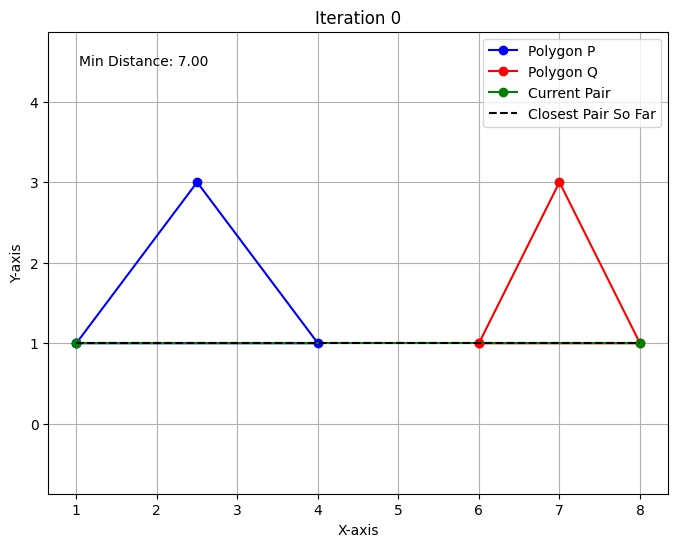

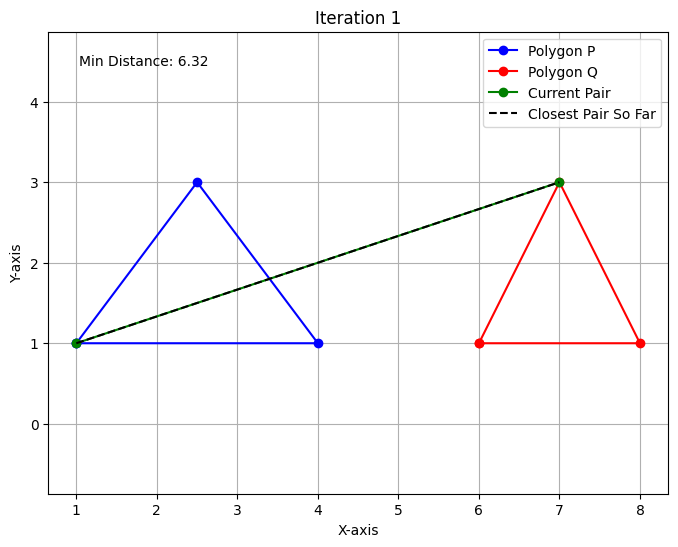

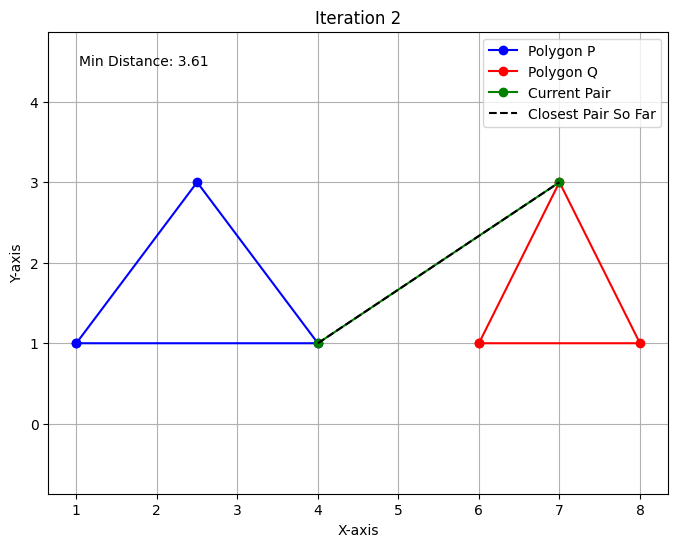

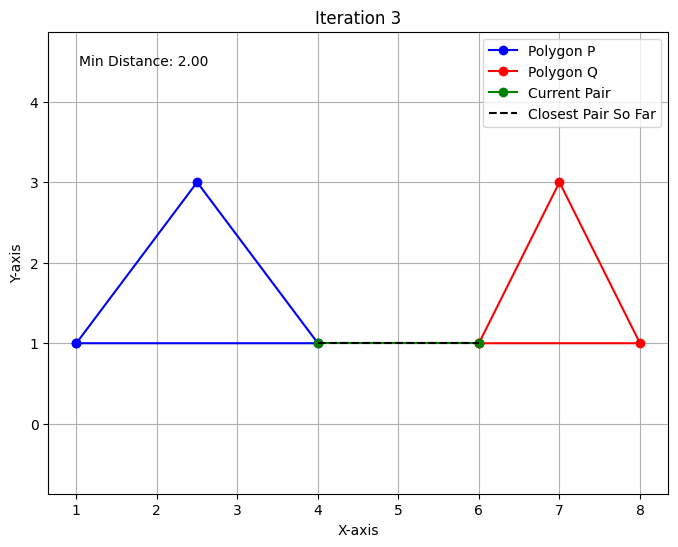

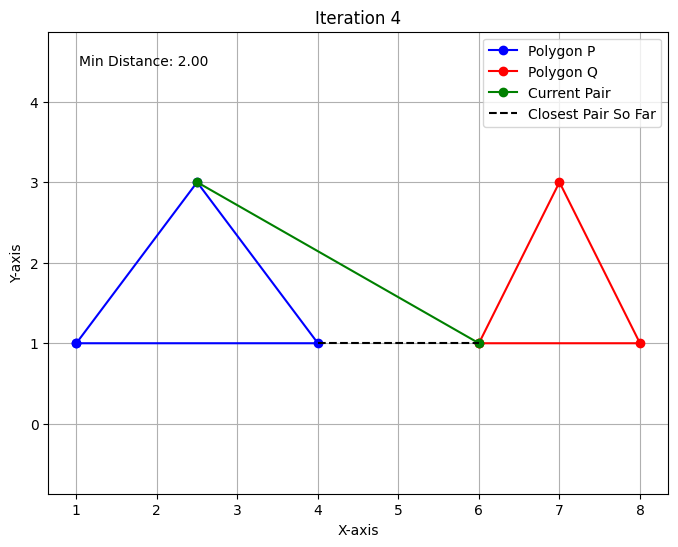

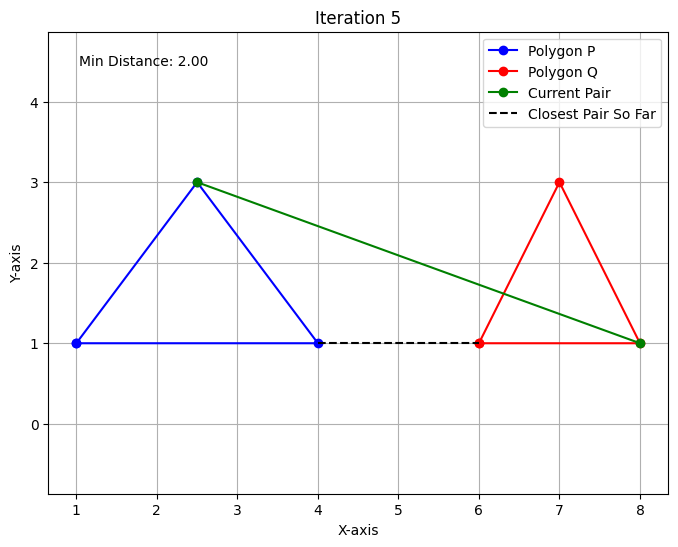

Test case: Simple Triangles
Closest points: ([4, 1], [6, 1])
Minimum distance: 2.0


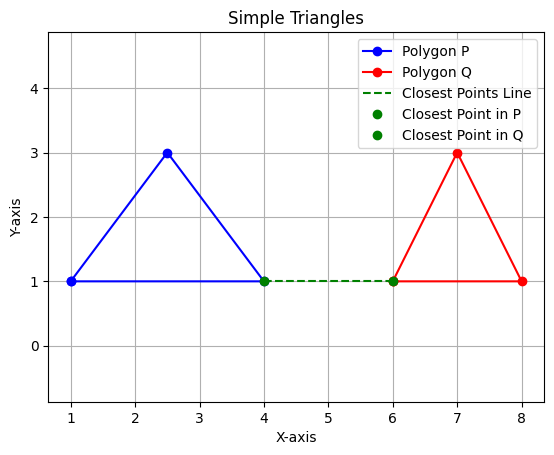

<Figure size 640x480 with 0 Axes>

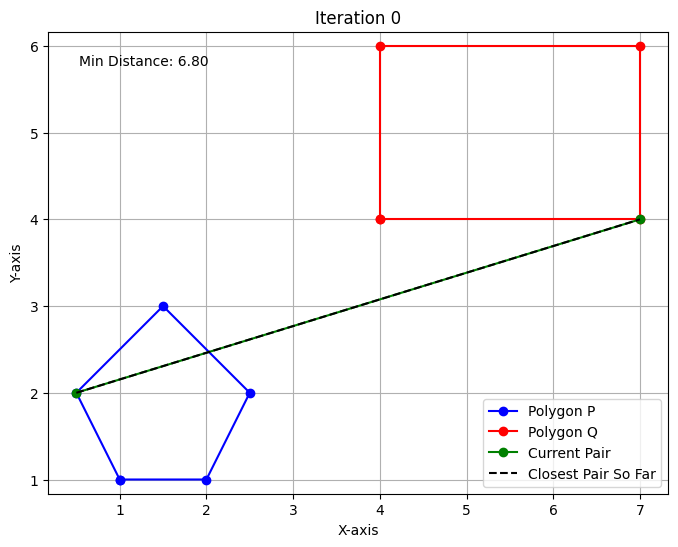

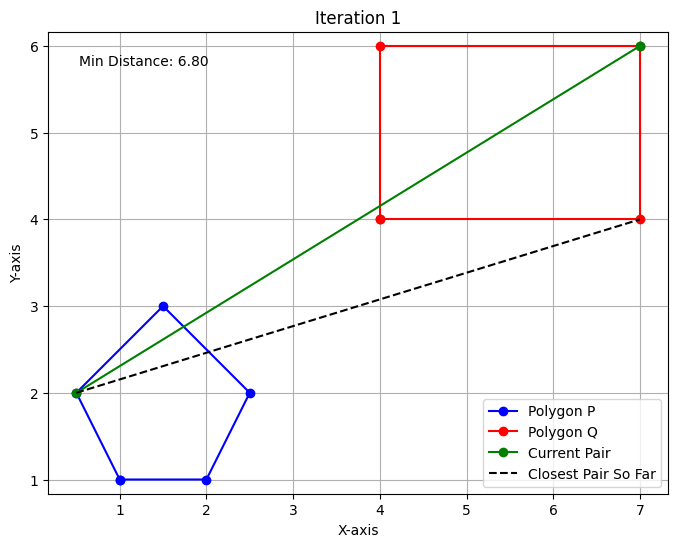

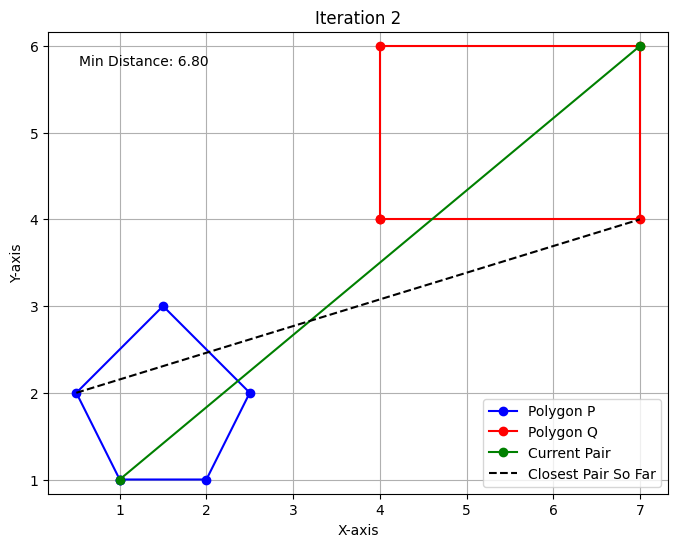

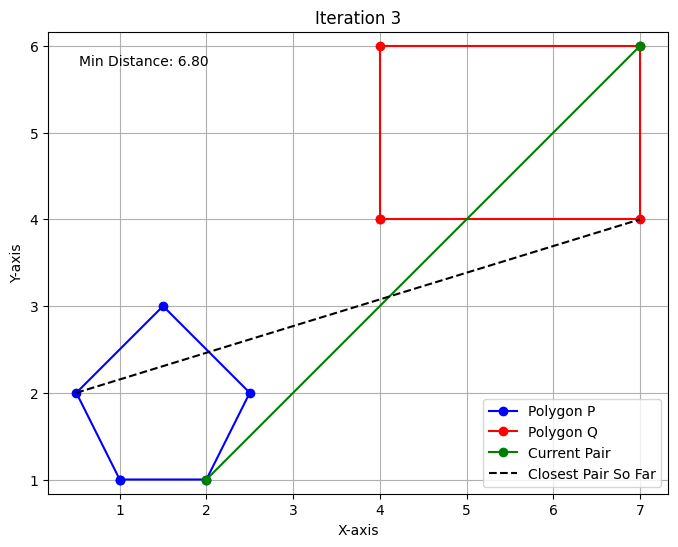

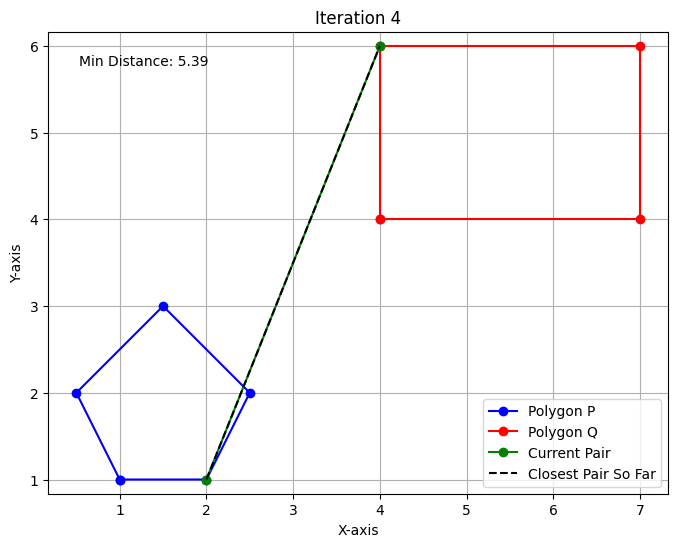

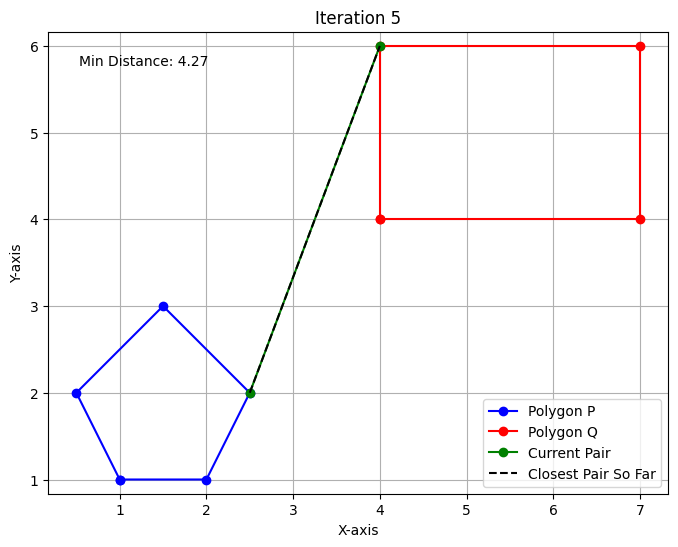

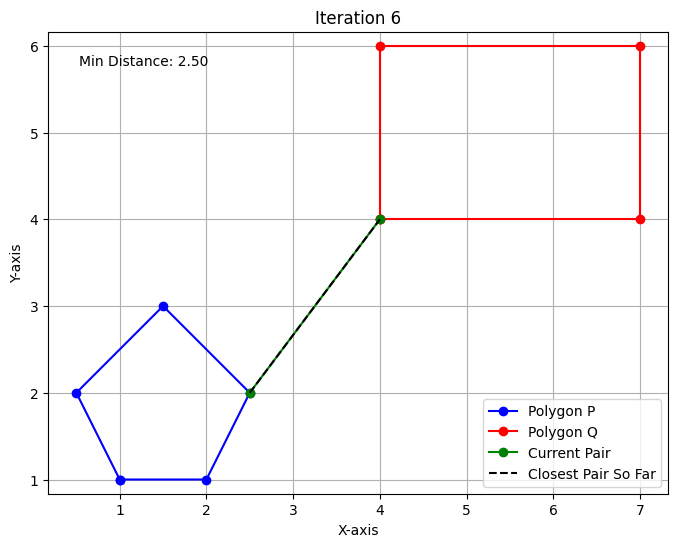

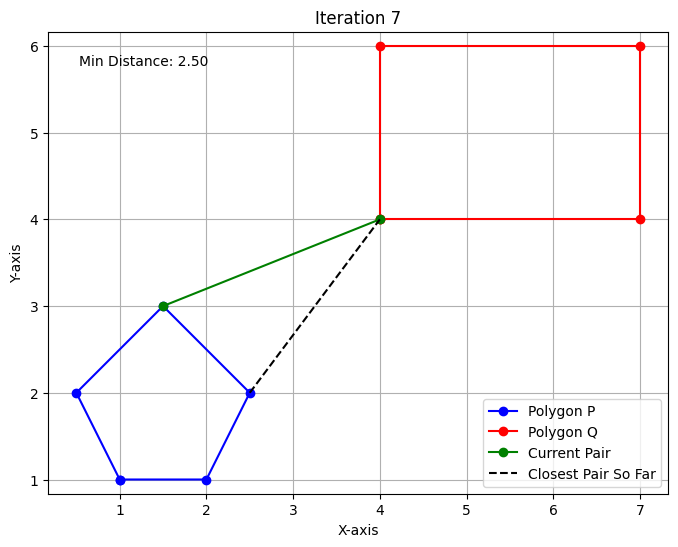

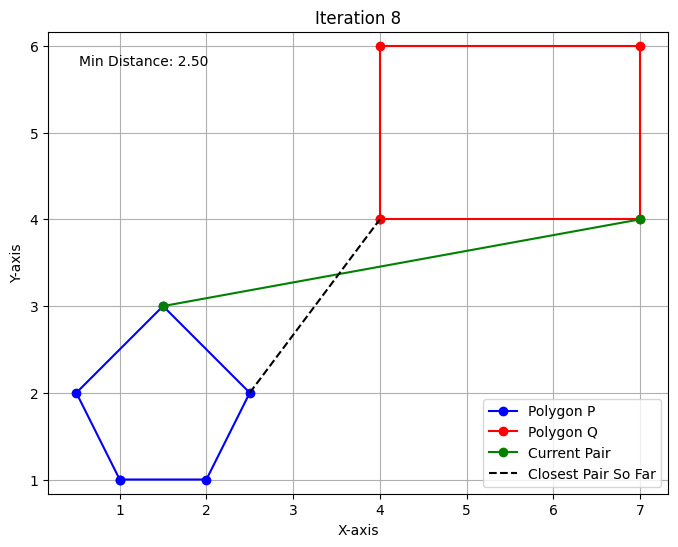

Test case: Polygon and Rectangle
Closest points: ([2.5, 2], [4, 4])
Minimum distance: 2.5


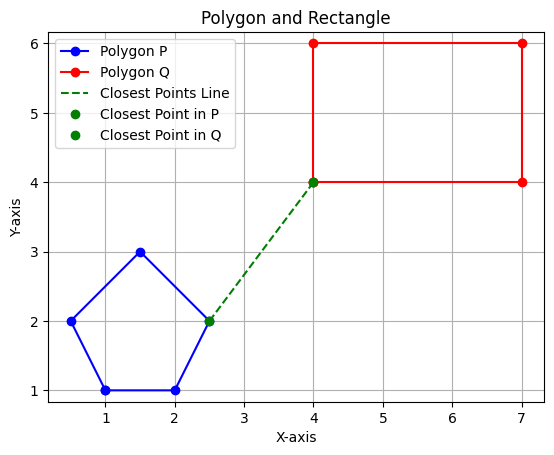

In [5]:
test_and_visualize_closest_points({k: test_cases[k] for k in list(test_cases.keys())[:2]}, True)

<Figure size 640x480 with 0 Axes>

Test case: Simple Triangles
Closest points: ([4, 1], [6, 1])
Minimum distance: 2.0


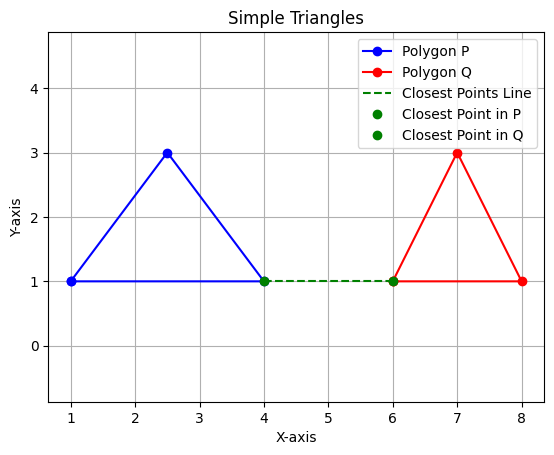

<Figure size 640x480 with 0 Axes>

Test case: Polygon and Rectangle
Closest points: ([2.5, 2], [4, 4])
Minimum distance: 2.5


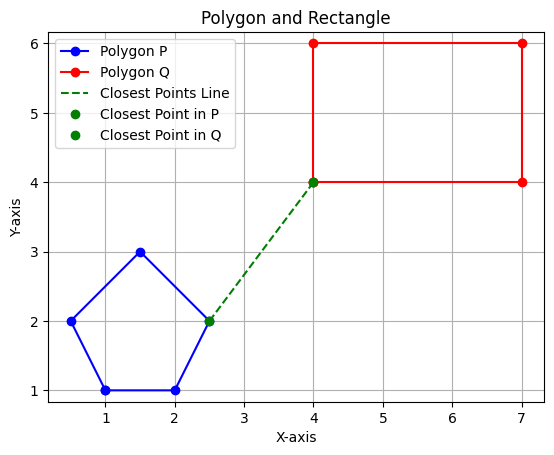

<Figure size 640x480 with 0 Axes>

Test case: Non-overlapping Vertically Aligned Polygons
Closest points: ([1.5, 3], [1, 5])
Minimum distance: 2.0615528128088303


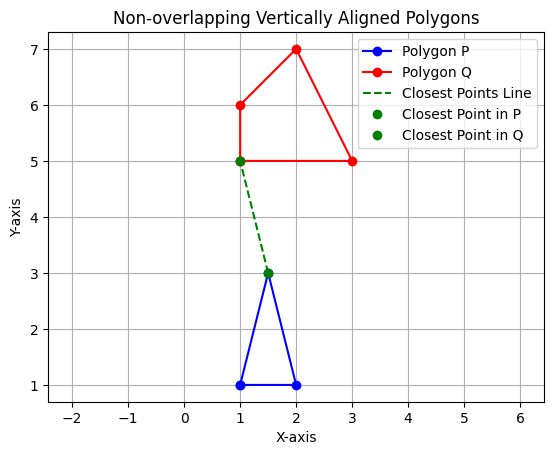

<Figure size 640x480 with 0 Axes>

Test case: Different Shapes, Corner-to-Corner
Closest points: ([2.5, 3], [5, 5])
Minimum distance: 3.2015621187164243


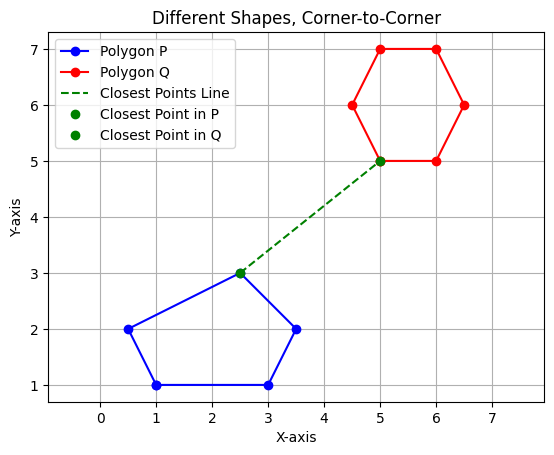

<Figure size 640x480 with 0 Axes>

Test case: Edge-to-Edge Close Non-overlapping
Closest points: ([4, 4], [5, 3])
Minimum distance: 1.4142135623730951


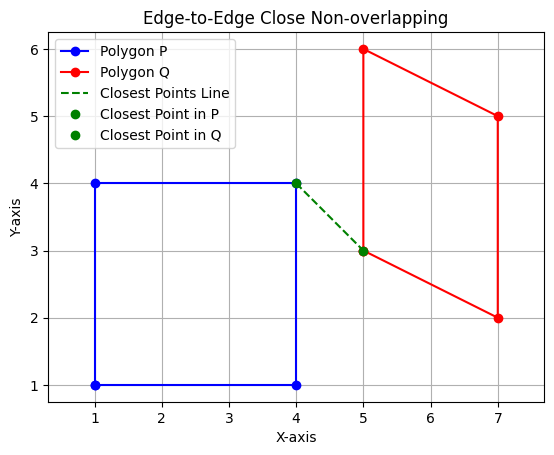

<Figure size 640x480 with 0 Axes>

Test case: Wide Gap
Closest points: ([0.5, 1], [10, 10])
Minimum distance: 13.0862523283024


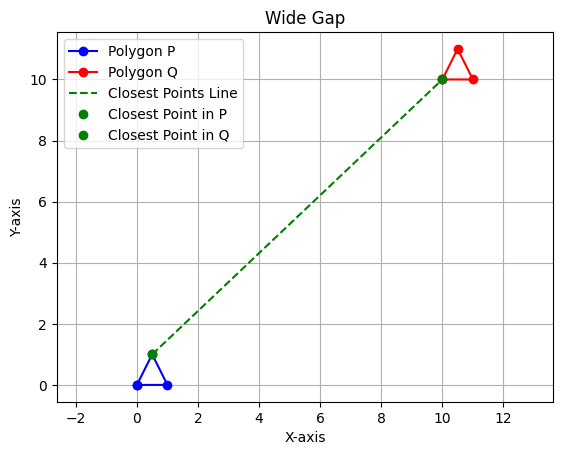

<Figure size 640x480 with 0 Axes>

Test case: Close Non-Intersecting Hexagons
Closest points: ([2.5, 1.5], [2.5, 1.5])
Minimum distance: 0.0


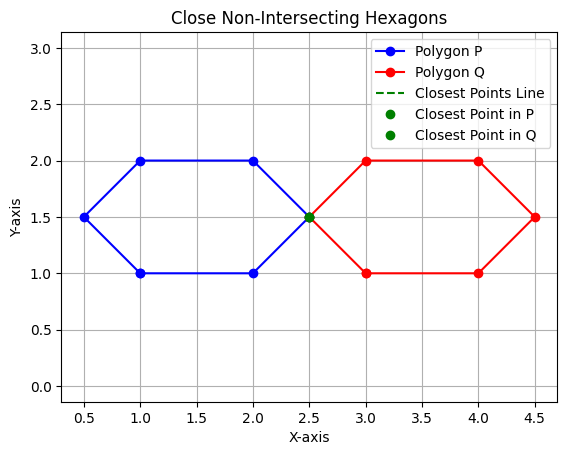

<Figure size 640x480 with 0 Axes>

Test case: Skewed Rectangle and Triangle
Closest points: ([4, 1], [5, 2])
Minimum distance: 1.4142135623730951


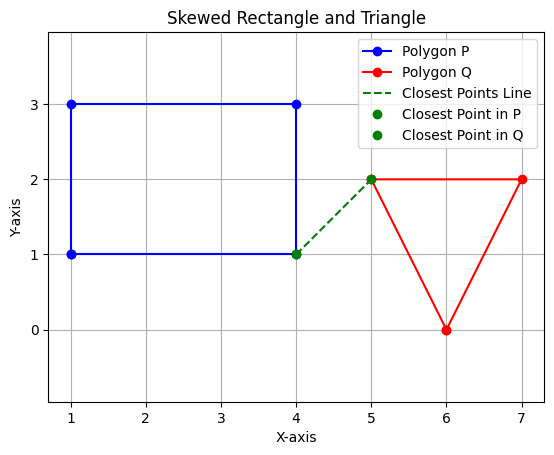

<Figure size 640x480 with 0 Axes>

Test case: Parallel Rectangles
Closest points: ([4, 3], [6, 3])
Minimum distance: 2.0


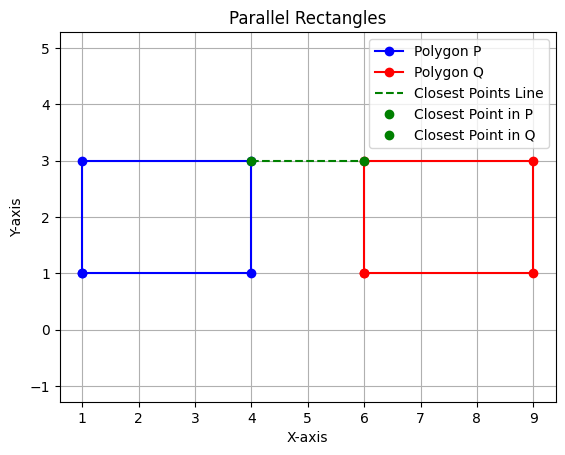

<Figure size 640x480 with 0 Axes>

Test case: Concave and Convex Shapes (L-shape and Triangle)
Closest points: ([3, 1], [3, 2])
Minimum distance: 1.0


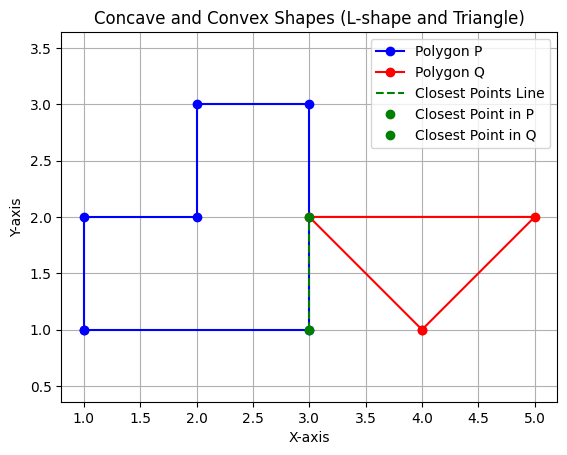

<Figure size 640x480 with 0 Axes>

Test case: Edge-to-Edge Nearly Touching Rectangles
Closest points: ([3, 3], [3.1, 3])
Minimum distance: 0.10000000000000009


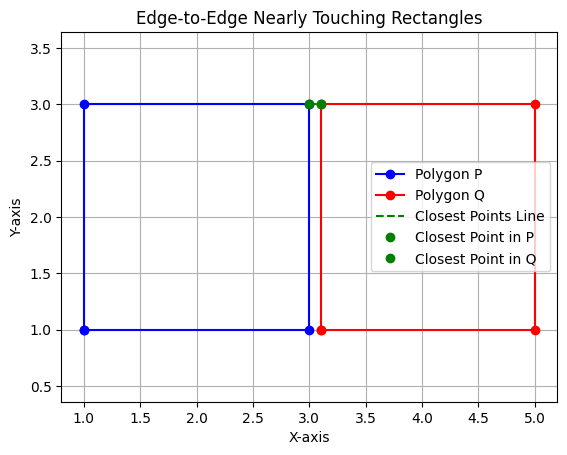

<Figure size 640x480 with 0 Axes>

Test case: Narrow Gap with Complex Polygons
Closest points: ([2.5, 1.5], [2.65, 1.9])
Minimum distance: 0.42720018726587644


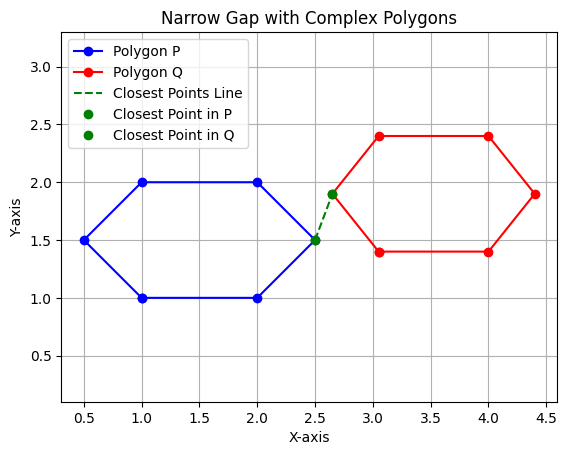

In [13]:
def test_and_visualize_closest_points_all(test_cases):
    for test_case, data in test_cases.items():
        P, Q = data["P"], data["Q"]
        closest_pair, min_dist = closest_points_convex_polygons_visual(P, Q, False)
        print(f"Test case: {test_case}")
        print("Closest points:", closest_pair)
        print("Minimum distance:", min_dist)
        
        fig, ax = plt.subplots()
        plot_polygons_with_closest_points(P, Q, closest_pair, ax, test_case)
        plt.show();
        
test_and_visualize_closest_points_all(test_cases)